# Time Serie forecasting fundamentals with Tensorflow: BitPredict

## Getting the data
The data used in the BitPredict is from https://www.coindesk.com/price/bitcoin

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-04-18 23:00:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-04-18 23:00:21 (54.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing Time series data with pandas

In [5]:
# Import pandas
import pandas as pd
# Read in the data and parse the dates
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date coulmn and make column 1 as datetime
df.head()                

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [8]:
# How many samples we have?
len(df)

2787

We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples ONLY

Typically deep learning models usually like lots and lots of samples (as in 1000,10000....and so on)

A smaller number of samples is something we'll often run into with time series data problems.

**Note** The **SEASONALITY** of a time series dataset is referred as the number of samples per year. So for our Bitcoin data, it has a seasonality of daily or value of 365, because we collected one sample per day meaning we'll get 365 samples per year.

In [9]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


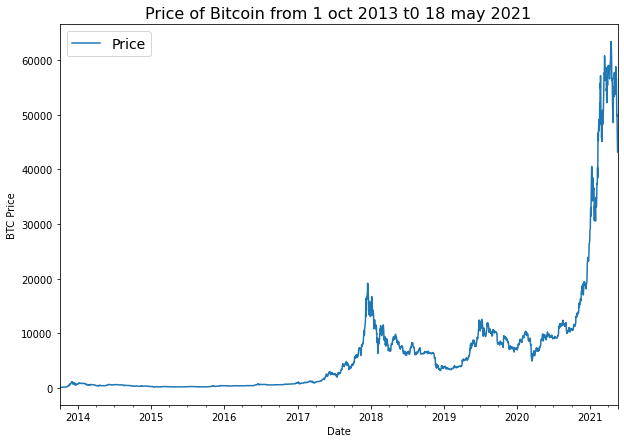

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 oct 2013 t0 18 may 2021", fontsize=16)
plt.legend(fontsize=14);

## Importing csv through python module

In [11]:
# Importing and formatting historical data with python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%d')) # get the dates in yymmdd format
    btc_price.append(float(line[2])) # get the closing price as float
    
# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [12]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

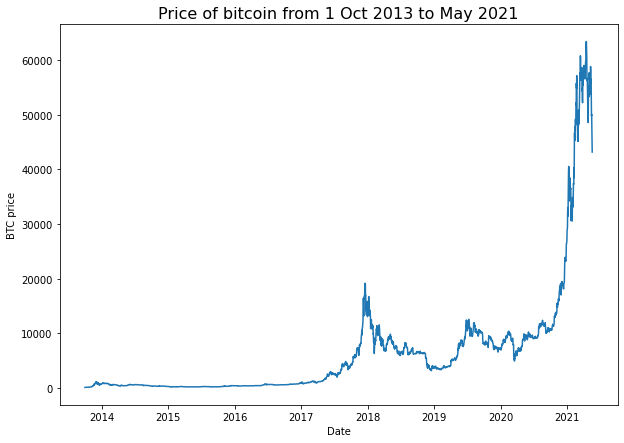

In [13]:
# Plot from csv
import matplotlib.pyplot as plt
# import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.title("Price of bitcoin from 1 Oct 2013 to May 2021", fontsize=16);

## Create data part 1: Creating training and test sets of our data

### Creating train and test sets with time series data (wrong way)

In [14]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [15]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,# dates
                                                    prices, # BTC price
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

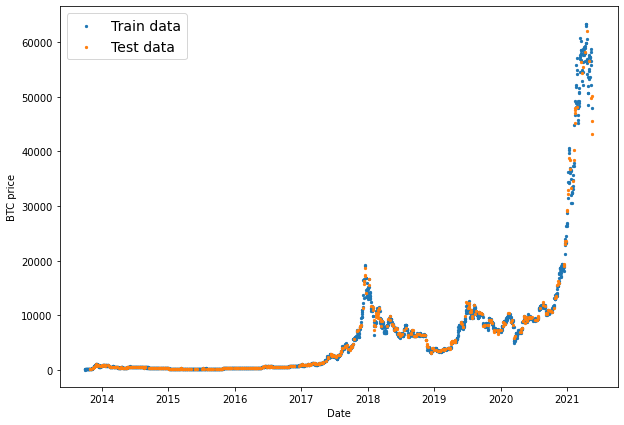

In [16]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.show;

### Create train and test sets for time series (Right way)

In [17]:
split_size = int(0.8* len(prices)) # 80% train , 20% test

# Create train data splits (everything before the split)
X_train,y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test , y_test =timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

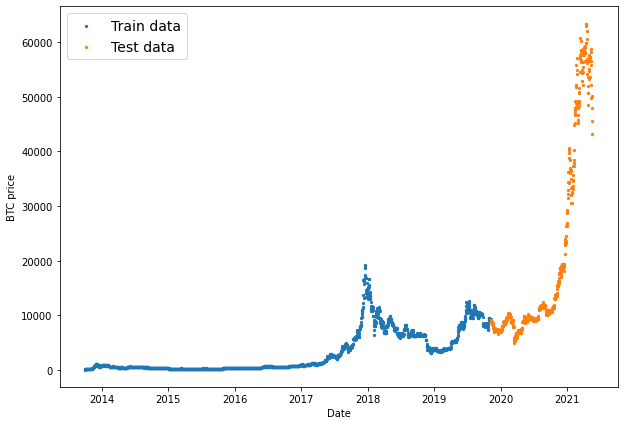

In [18]:
# Let's plot right train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.legend(fontsize=14)
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.show;

### Create a ploting function

In [19]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps
  """
  # Plot the series
  
  plt.plot(timesteps[start:end],values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

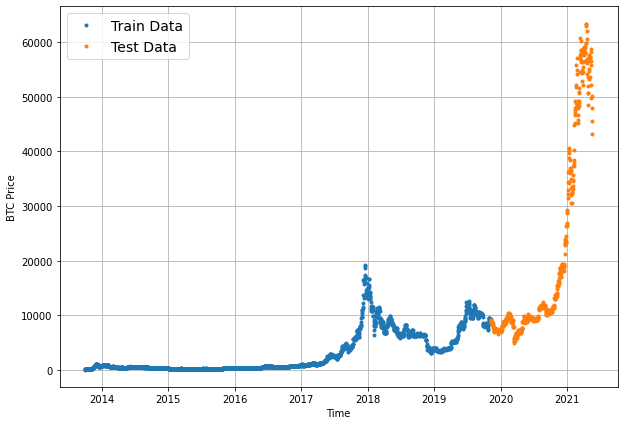

In [20]:
# Test out plot function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train,label ="Train Data")
plot_time_series(timesteps=X_test, values=y_test, label= "Test Data")

## Modelling Experiments

Terms to be familar with:
**Horizon** = number of timesteps into the future we're going to predict
**Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments we're running:

* 0 Naïve model (baseline)
* 1 Dense model, horizon = 1, window = 7
* 2 Same as 1, horizon = 1, window = 30
* 3 Same as 1, horizon = 7, window = 30
* 4 Conv1D
* 5 LSTM
* 6 Same as 1 (but with multivariate data)
* 7 N-BEATs Algorithm
* 8 Ensemble (multiple models optimized on different loss functions)
* 9 Future prediction model (model to predict future values)
* 10 Same as 1 (but with turkey 🦃 data introduced)

## Model 0: Naive Forcast (baseline)

The formula looks like:
$$\hat{y}_{t} = y_{t-1}$$

In english:
> The prediction at timestep t(y-hat) is equal to the value at timestep t-1 (previous timestep)-- this is for a horizon of 1.

In [21]:
# Create a naive forcast
naive_forcast = y_test[:-1]

naive_forcast[:10], naive_forcast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

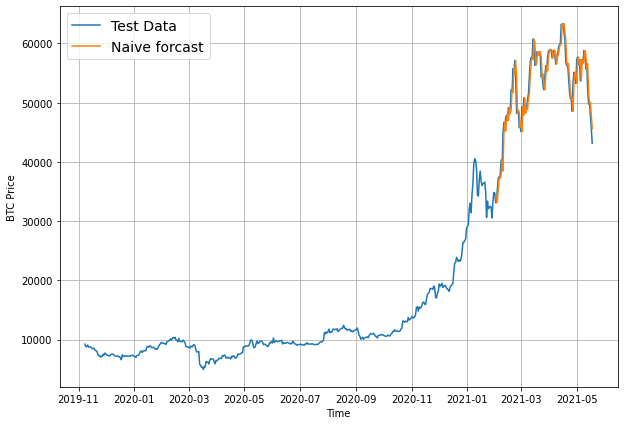

In [22]:
# Plot Naive forcast
plt.figure(figsize=(10,7))
#plot_time_series(X_train,y_train,format=".",label="Train Data")
plot_time_series(X_test,y_test, format="-", label="Test Data")
plot_time_series(X_test[1:],naive_forcast, format="-",start=450, label="Naive forcast")

### Evaluating a time series model

what are we doing??

We're predicting a number, so that means we have a form of a regression problem.

Because we are working on a regrresion problem, we need some regression like metrics.

Some of the common regression metrics (which can also be used for time series forcasting):
* MAE : Mean absolute error
* MSE
* RMSE
* MAPE/sMAPE: (symmetric) mean absolute percentage error
* MASE: Mean absolute scaled error


For all the above metrics **LOWER IS BETTER**, for example, an MAE of 0 is better than the MAE of 100.

The main thing we are evaluating is : **How do our model's forcasts (y_pred) compared against the actual values (y_true or ground truth values)?**

> 📖 Resource: For a deeper dive on the various kinds of time series forecasting methods see Forecasting: Principles and Practice chapter 5.8

In [23]:
import tensorflow as tf

In [24]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implementation MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forcast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is 1

  return mae/mae_naive_no_season

In [25]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forcast).numpy()

0.9995699939182624

In [26]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculation)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}
                                                      

Naive results

In [27]:
naive_results = evaluate_preds(y_true= y_test[1:],
                              y_pred= naive_forcast)
naive_results

{'mae': 567.9802,
 'mape': 567.9802,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format Data Part 2 : Windowing our dataset

Why do we window?
We window our time series dataset to turn our data into a supervised learning problem.

```
Window for one week {format}
[0,1,2,3,4,5,6] --> [7]
[0,1,2,3,4,5,6,7] --> [8]
[0,1,2,3,4,5,6,7,8] -->[9]
```

In [28]:
len(y_train)

2229

In [29]:
# what we want to do with Bitcoin data
print(f"we want to use:{btc_price[:7]} to predict this:{btc_price[7]}")

we want to use:[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this:123.033


In [30]:
# Let's setup global variable for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # Use the past week of bitcoin data to make the prediction

In [31]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.

  eg. if horizon=1
  input: [0,1,2,3,4,5,6,7] --> Output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:, :-horizon], x[:,-horizon] 

In [32]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window:{tf.squeeze(test_window).numpy()}--> Label:{test_label.numpy()}")

Window:[0 1 2 3 4 5 6]--> Label:[7]


_We need to do the above across the entire price series._

_we could do this with Python for loops, however for large time series, that will be quite slow._

_To speed things up, we'll leverage NumPy's array indexing._

### Making a funtion for above

1. Create a window step of specific window size (eg. [0,1,2,3,4,5,6])
2. Use NumPy indexing to create a 2D array of multiple window steps, for example
```
[0,1,2,3,4,5,6] 
[0,1,2,3,4,5,6,7] 
[0,1,2,3,4,5,6,7,8]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical prcie of Bitcoin)
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with specified horizon

In [33]:
import numpy as np
 # Create funtion to view NumPy arrays 
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1d array into a 2d array of sequential labelled windows of window size with horizon size labels.
  """
  #1. Create a window of specific window size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  #2. Create a 2D array of Multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # creat 2D array
  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  #3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  #4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array,horizon=horizon)
  
  return windows, labels

In [34]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [35]:
# View the first 3 windows
for i in range(3):
  print(f"Wndow:{full_windows[i]}--> Label:{full_labels[i]}")

Wndow:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]--> Label:123.033
Wndow:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]--> Label:124.049
Wndow:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]--> Label:125.96116


In [36]:
# View the last 3 windows
for i in range(3):
  print(f"window:{full_windows[i-3]}--> Label:{full_labels[i-3]}")

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]--> Label:47885.6252547166
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]--> Label:45604.6157536131
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]--> Label:43144.4712908603


## Turning windows into training and test sets

In [37]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  split_size = int(len(windows)*(1-test_split)) # this will default to 80% train and 20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [38]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [39]:
# View first 5 train_windows and train_labels
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ]))

In [40]:
# View first 5 test_windows and test_labels
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([8798.04205463, 9081.18687849, 8711.53433917, 8760.89271814,
        8749.52059102]))

### Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiments to experiments, we're going to write a model checkpoint so we can compare appels to appels

More specifically, we want to compare each of our models best performance against the other models best performance.

for eg. i our model performs the best on epoch 55 (but we're training for 100 epochs), we want to-load and evaluate the model saved on epoch 55.

In [41]:
import os

# Create a function to implement a ModelCheckpoint callback with specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window=7, horizon=1)

Our first deep model is going to be a simple dense model:
```
* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss funtion
* Batch size of 128 (previously we have use 32)
* 100 epoch
```

**Hyperparameters** = values a machine learning practioner (we) can adjust themselves.

**Parameters** = values a model learns on its own

In [42]:
import tensorflow as tf
from tensorflow.keras import layers
# Set random seed 
tf.random.set_seed(42)

#1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON,activation="linear")
], name="model_1_dense")

#2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])
#3.Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 3s 41ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [43]:
# Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [44]:
# Load in the saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forcasts with a model (on the test data)

To make "forecasts" on the test datasets (note: these won't be actual forecaste, they're only psuedo forcasts because the future), let's write code to:
1. Take in a train model
2. Takes in some input data (same kind of the data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Return the prediction

In [45]:
def make_preds(model, input_data):
  """
  Uses model to make prediction input_data
  """
  forecast =model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array

In [46]:
# Make predictions using model_1 on the test data and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
        8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>)

In [47]:
# Evalute preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95105,
 'mape': 568.95105,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

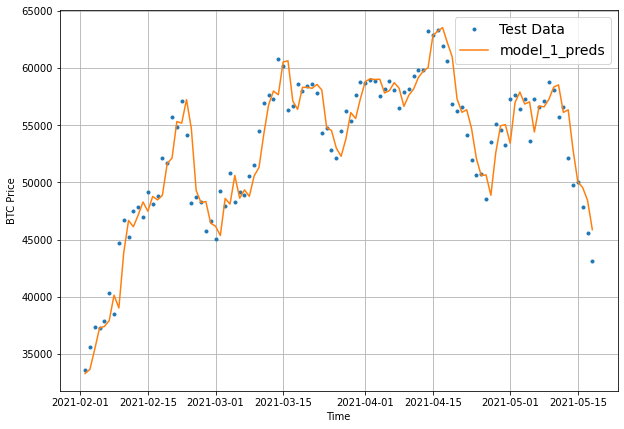

In [48]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[0:], 
                 start=offset, 
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset, 
                 format="-",
                 label="model_1_preds")

Auto-corelation (why our prediction lag behind the values)


## Model 2: Dense (Window=30, horizon=1)

In [49]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [50]:
# # Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [51]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows= full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)

In [52]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [53]:
import tensorflow as tf
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
     layers.Dense(128,activation="relu"),
     layers.Dense(HORIZON)                          
],name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [54]:
# Evaluate model_2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332


659.3331909179688

In [55]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741


605.8740844726562

In [56]:
 # Get forecast predictions
 model_2_preds = make_preds(model_2,
                            input_data=test_windows)

In [57]:
# Evaluate results for model_2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 605.8741,
 'mape': 605.8741,
 'mase': 1.0590738,
 'mse': 1273360.8,
 'rmse': 1128.4329}

In [58]:
test_labels.shape

(552,)

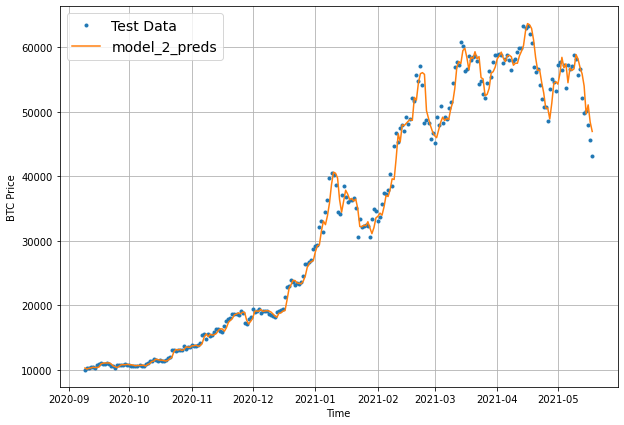

In [59]:
# Plot the predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, format=".", label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

In [60]:
WINDOW_SIZE=30
HORIZON = 7

In [61]:
# Make data appropriate to window_size = 30 and horizon=7
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [62]:
# Spilt the windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                               labels=full_labels)
                                                                               
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [63]:
# Model_3

tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(HORIZON)                       
],name="model_3.Dense")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3.Dense/assets
INFO:tensorflow:Assets written to: mod

In [64]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 631.6785


631.6785278320312

In [65]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3.Dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 600.7496


600.7496337890625

In [66]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9224.13 , 9154.924, 9299.73 , 9251.522, 9305.401, 9306.764,
        9273.633],
       [8930.116, 8847.645, 9044.077, 8862.419, 8873.712, 8872.553,
        8943.857],
       [8946.46 , 8716.853, 8924.921, 8772.178, 8757.802, 8726.958,
        8809.778],
       [9114.119, 8751.043, 8870.924, 8891.435, 8778.229, 8846.106,
        8829.151],
       [8993.526, 8668.739, 8665.086, 8755.513, 8857.393, 8840.144,
        8737.792]], dtype=float32)>

In [67]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8882.84 , 8904.423, 8762.442, 8559.087, 8428.983], dtype=float32)>

In [68]:
tf.squeeze(test_labels)

<tf.Tensor: shape=(551,), dtype=float64, numpy=
array([ 8794.35864452,  8798.04205463,  9081.18687849,  8711.53433917,
        8760.89271814,  8749.52059102,  8656.97092235,  8500.64355816,
        8469.2608989 ,  8537.33965197,  8205.80636599,  8118.4885358 ,
        8074.84317361,  7612.7405735 ,  7262.11053495,  7303.40575852,
        7041.73293642,  7211.86180875,  7141.06944869,  7523.4806726 ,
        7390.20746923,  7729.26593894,  7542.23560864,  7381.96300782,
        7333.43293049,  7315.36776456,  7213.73376172,  7398.78704961,
        7511.88058312,  7532.12351309,  7550.23919987,  7333.09604316,
        7239.76257544,  7198.06667705,  7190.27236926,  7238.87432299,
        7087.02498535,  7112.73147612,  6883.49639377,  6584.02884335,
        7424.01540023,  7147.56832379,  7139.93337053,  7286.33508116,
        7236.98620461,  7166.17237853,  7235.6266505 ,  7212.80939522,
        7183.70653603,  7227.29371168,  7311.56064392,  7385.46484791,
        7251.27679432,  7179.

In [69]:
model_3_preds.shape

TensorShape([551, 7])

In [70]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred= tf.transpose( model_3_preds))
model_3_results

{'mae': array([594.64197, 625.0083 , 593.5288 , 600.66595, 591.04486, 587.54956,
        612.8081 ], dtype=float32),
 'mape': array([594.64197, 625.0083 , 593.5288 , 600.66595, 591.04486, 587.54956,
        612.8081 ], dtype=float32),
 'mase': 1.0942013,
 'mse': array([1181209.1, 1307744. , 1231338.4, 1210674.4, 1221201.1, 1204629.4,
        1307964.9], dtype=float32),
 'rmse': array([1086.8345, 1143.5664, 1109.6569, 1100.3065, 1105.0797, 1097.556 ,
        1143.663 ], dtype=float32)}

In [71]:
tf.transpose( model_3_preds).shape, tf.squeeze(test_labels).shape

(TensorShape([7, 551]), TensorShape([551]))

### Make our evaluation fuction work for larger horizons


In [72]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics 
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [73]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true= tf.squeeze(test_labels),
                                 y_pred= tf.transpose( model_3_preds))
model_3_results

{'mae': 600.7497,
 'mape': 2.8378983,
 'mase': 1.0942013,
 'mse': 1237823.1,
 'rmse': 1112.3805}

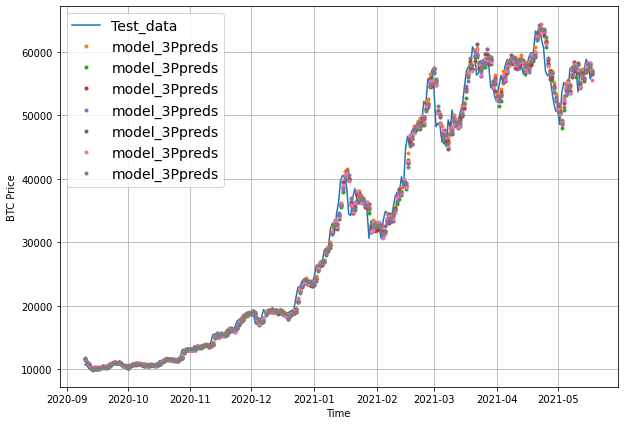

In [74]:
## Plot model_3 predictions
offset =300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, format="-", label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_3_preds,start=offset,  label="model_3Ppreds")

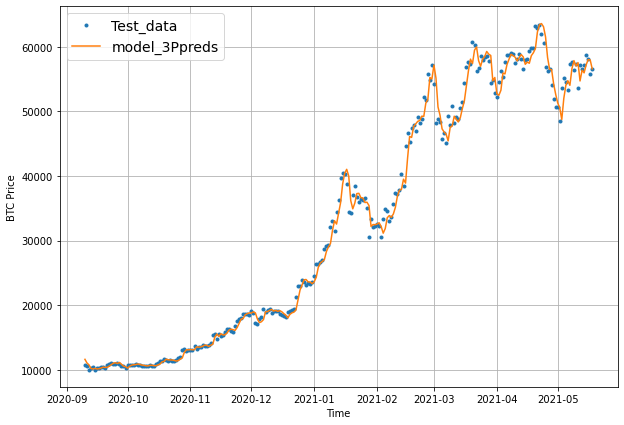

In [75]:
## Plot model_3 predictions
offset =300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=tf.reduce_mean(model_3_preds,axis=1),format="-",start=offset,  label="model_3Ppreds")

In [76]:
# Making dataframe of results
results_df = pd.DataFrame({"naive": naive_results["mae"],
                           "horizon_1_window_7":model_1_results["mae"],
                           "horizon_1_window_30": model_2_results["mae"],
                           "horizon_7_window_30":model_3_results["mae"]},index=["mae"])
results_df.T

,mae
naive,567.980225
horizon_1_window_7,568.951050
horizon_1_window_30,605.874084
horizon_7_window_30,600.749695


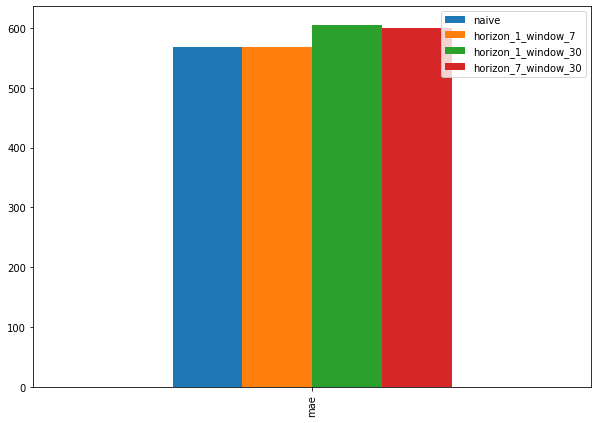

In [77]:
results_df.plot(figsize=(10,7),kind="bar");

### What is autocorrelation in time series???

it represents the degree of similarity between a given time series and a lagged version of itself over a successive time interval. Autocorrelation measures the relationship between a variable's current value and it's past values.

what type of data does auto-correlation ocurs??

## Model 4: Conv1D



In [78]:
HORIZON = 1
WINDOW_SIZE = 7 

In [79]:
# Create windowed data
full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [80]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

we need an input shape of: `(batch_size, timesteps,input_dim)..`

In [81]:
# Check data input shape
train_windows[0].shape # returns (window_size,)

(7,)

In [82]:
# Before we pass our data to  Conv1D, we have to reshape it in order to make
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [83]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add extra dimension

In [84]:
# Test our lambda layer
print(f"Original shape: {x.shape}") 
print(f"Expanded shape:{expand_dims_layer(x).shape}")
print(f"Original values with expanded dimension shape:\n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape:(7, 1)
Original values with expanded dimension shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


### Making Conv1D Model

In [85]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
   layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
   layers.Conv1D(filters=256,
                 kernel_size=5,
                 strides=1,
                 padding="causal",
                 activation = "relu"),  
   layers.Dense(HORIZON)                         
], name="model_4_Conv1D")

# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_Conv1D/assets


In [86]:
# Evaluate model_4
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 17702.5020


17702.501953125

In [87]:
# Load back best performing model
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_Conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 15062.6816


15062.681640625

In [88]:
# Make predictions 
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2279.6736, 2274.5984, 2308.1436, 2243.0662, 2256.006 , 2247.2097,
       2195.8604, 2191.854 , 2181.4814, 2173.0051], dtype=float32)>

In [89]:
# Evaluate predctions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 15062.684,
 'mape': 74.84904,
 'mase': 26.460962,
 'mse': 399866370.0,
 'rmse': 19996.658}

In [90]:
model_4.summary()

Model: "model_4_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            9216      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              257       
                                                                 
Total params: 9,473
Trainable params: 9,473
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [92]:
len(test_windows), len(test_labels)

(556, 556)

## LSTM (RNN)

In [93]:
## Creating LSTM using functional API
tf.random.set_seed(4)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
#x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs= inputs,
                         outputs= output,
                         name="model_5_LSTM")

#Compile
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_5.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
11/18 [=================>............] - ETA: 0s - loss: 2731.7683 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 108ms/step - loss: 2425.2783 - val_loss: 9718.7588
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 917.3074 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 110ms/step - loss: 709.3548 - val_loss: 1122.8282
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 191.1675INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 183.7100 - val_loss: 969.0591
Epoch 4/100
12/18 [===================>..........] - ETA: 0s - loss: 167.3743INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 166.4607 - val_loss: 840.7547
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 151.5035 - val_loss: 942.4872
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 170.8820 - val_loss: 885.1844
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 152.7368INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 155.2373 - val_loss: 824.0999
Epoch 8/100
18/18 [==============================] - 0s 7ms/step - loss: 151.0312 - val_loss: 881.3632
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 153.6098 - val_loss: 1008.3642
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 163.5940 - val_loss: 955.0054
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 161.9496 - val_loss: 916.2432
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 162.4061 - val_loss: 926.6086
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 160.6283 - val_loss: 894.2092
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 157.8840 - val_loss: 891.4592
Epoch 15/100
18/18 [==============================] - 0s 7ms/step - loss: 155.2266 - val_loss: 864.0881
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 15

INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 146.4053 - val_loss: 806.7617
Epoch 22/100
18/18 [==============================] - 0s 7ms/step - loss: 146.8610 - val_loss: 868.2794
Epoch 23/100
18/18 [==============================] - 0s 6ms/step - loss: 142.7105 - val_loss: 861.6118
Epoch 24/100
12/18 [===================>..........] - ETA: 0s - loss: 146.2203INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 142.7126 - val_loss: 791.2927
Epoch 25/100
12/18 [===================>..........] - ETA: 0s - loss: 146.8486INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 142.4546 - val_loss: 790.5013
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 137.2126INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 139.1228 - val_loss: 767.2391
Epoch 27/100
18/18 [==============================] - 0s 7ms/step - loss: 138.3598 - val_loss: 779.0197
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 142.9592INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 137.9424 - val_loss: 761.6815
Epoch 29/100
12/18 [===================>..........] - ETA: 0s - loss: 134.2410INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 136.0421 - val_loss: 745.5388
Epoch 30/100
12/18 [===================>..........] - ETA: 0s - loss: 135.6099INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 135.6576 - val_loss: 740.2247
Epoch 31/100
18/18 [==============================] - 0s 7ms/step - loss: 133.8151 - val_loss: 788.1214
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 131.2655INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 133.3120 - val_loss: 730.7230
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 125.5478INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 132.9133 - val_loss: 727.8332
Epoch 34/100
12/18 [===================>..........] - ETA: 0s - loss: 133.3980INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 134.1700 - val_loss: 712.5646
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 129.3380 - val_loss: 749.0944
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 127.7708INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 113ms/step - loss: 129.6841 - val_loss: 709.0240
Epoch 37/100
12/18 [===================>..........] - ETA: 0s - loss: 122.7098INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 127.5400 - val_loss: 702.8523
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 129.7695INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 125.8016 - val_loss: 701.2049
Epoch 39/100
12/18 [===================>..........] - ETA: 0s - loss: 125.5189INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 129.6234 - val_loss: 696.3665
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 126.5285 - val_loss: 779.5599
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 133.3527INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 149ms/step - loss: 131.9496 - val_loss: 694.3145
Epoch 42/100
18/18 [==============================] - 0s 15ms/step - loss: 128.4969 - val_loss: 695.1099
Epoch 43/100
13/18 [====================>.........] - ETA: 0s - loss: 134.7669INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 156ms/step - loss: 128.1309 - val_loss: 666.3561
Epoch 44/100
18/18 [==============================] - 0s 7ms/step - loss: 122.5163 - val_loss: 743.0396
Epoch 45/100
12/18 [===================>..........] - ETA: 0s - loss: 128.8266INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 218ms/step - loss: 123.8576 - val_loss: 660.1479
Epoch 46/100
18/18 [==============================] - 0s 18ms/step - loss: 121.6535 - val_loss: 660.9683
Epoch 47/100
18/18 [==============================] - 0s 21ms/step - loss: 120.9979 - val_loss: 660.2028
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 118.3154INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 7s 425ms/step - loss: 119.8303 - val_loss: 649.8221
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 119.3892INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 251ms/step - loss: 119.3165 - val_loss: 646.7206
Epoch 50/100
18/18 [==============================] - 0s 12ms/step - loss: 120.3834 - val_loss: 750.0181
Epoch 51/100
18/18 [==============================] - 0s 10ms/step - loss: 121.8634 - val_loss: 647.5259
Epoch 52/100
10/18 [===============>..............] - ETA: 0s - loss: 120.6995INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 176ms/step - loss: 119.9903 - val_loss: 638.0145
Epoch 53/100
18/18 [==============================] - 0s 13ms/step - loss: 117.8827 - val_loss: 639.2643
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 121.9068INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 206ms/step - loss: 118.6619 - val_loss: 635.1087
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 116.9165INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 148ms/step - loss: 119.0129 - val_loss: 630.9432
Epoch 56/100
12/18 [===================>..........] - ETA: 0s - loss: 109.2574INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 118.1404 - val_loss: 629.8151
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8600 - val_loss: 659.5230
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 121.6854 - val_loss: 642.2432
Epoch 59/100
18/18 [==============================] - 0s 7ms/step - loss: 120.0687 - val_loss: 638.3182
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 116.7890 - val_loss: 632.1650
Epoch 61/100
12/18 [===================>..........] - ETA: 0s - loss: 118.2624INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 117.5583 - val_loss: 619.4426
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 119.6525INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 116.3517 - val_loss: 619.3712
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4825 - val_loss: 665.0608
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 116.5843 - val_loss: 622.5001
Epoch 65/100
12/18 [===================>..........] - ETA: 0s - loss: 111.3468INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 117ms/step - loss: 116.2461 - val_loss: 614.9766
Epoch 66/100
12/18 [===================>..........] - ETA: 0s - loss: 119.6349INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 100ms/step - loss: 115.0078 - val_loss: 613.4354
Epoch 67/100
11/18 [=================>............] - ETA: 0s - loss: 114.8902INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 117.3700 - val_loss: 609.6727
Epoch 68/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9632 - val_loss: 611.0800
Epoch 69/100
12/18 [===================>..........] - ETA: 0s - loss: 108.3257INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 114.4159 - val_loss: 609.4885
Epoch 70/100
18/18 [==============================] - 0s 7ms/step - loss: 114.2609 - val_loss: 674.5678
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1054 - val_loss: 665.9263
Epoch 72/100
18/18 [==============================] - 0s 6ms/step - loss: 126.7857 - val_loss: 613.1263
Epoch 73/100
12/18 [===================>..........] - ETA: 0s - loss: 110.5990INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 117.0557 - val_loss: 603.0433
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 119.7057 - val_loss: 631.4424
Epoch 75/100
11/18 [=================>............] - ETA: 0s - loss: 111.3391INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 113.8260 - val_loss: 602.0948
Epoch 76/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3484 - val_loss: 604.6243
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 112.4757 - val_loss: 626.7093
Epoch 78/100
12/18 [===================>..........] - ETA: 0s - loss: 116.3845INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 96ms/step - loss: 112.7816 - val_loss: 601.8839
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 121.0501INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 119.4962 - val_loss: 597.7264
Epoch 80/100
12/18 [===================>..........] - ETA: 0s - loss: 114.7409INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 114.5898 - val_loss: 596.7156
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8094 - val_loss: 607.4258
Epoch 82/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0777 - val_loss: 596.7888
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 116.6837 - val_loss: 601.7050
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9256 - val_loss: 611.3587
Epoch 85/100
12/18 [===================>..........] - ETA: 0s - loss: 115.7168INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 99ms/step - loss: 111.9119 - val_loss: 593.6841
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 111.6628 - val_loss: 654.4600
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 108.8366INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 111.7803 - val_loss: 593.4766
Epoch 88/100
18/18 [==============================] - 0s 7ms/step - loss: 111.0558 - val_loss: 601.5565
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6782 - val_loss: 594.5656
Epoch 90/100
12/18 [===================>..........] - ETA: 0s - loss: 111.5173INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 115ms/step - loss: 114.0356 - val_loss: 590.5212
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.3088 - val_loss: 598.3694
Epoch 92/100
12/18 [===================>..........] - ETA: 0s - loss: 110.0279INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 97ms/step - loss: 111.1212 - val_loss: 588.6064
Epoch 93/100
12/18 [===================>..........] - ETA: 0s - loss: 108.3248INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 98ms/step - loss: 111.5616 - val_loss: 587.0405
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7176 - val_loss: 699.0372
Epoch 95/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9871 - val_loss: 653.9225
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 116.6654 - val_loss: 608.4285
Epoch 97/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9245 - val_loss: 681.6684
Epoch 98/100
12/18 [===================>..........] - ETA: 0s - loss: 113.5147INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 116ms/step - loss: 116.5020 - val_loss: 584.9245
Epoch 99/100
18/18 [==============================] - 0s 7ms/step - loss: 110.6570 - val_loss: 588.1451
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 109.3626 - val_loss: 592.1182


In [94]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 584.9246


584.924560546875

In [95]:
# Make predictions with LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8956.955, 8819.797, 8984.396, 8806.158, 8780.51 ], dtype=float32)>

In [96]:
# Evaluate model_5 predictions
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)
model_5_results

{'mae': 584.92456,
 'mape': 2.6420121,
 'mase': 1.0275505,
 'mse': 1227648.4,
 'rmse': 1107.9929}

**NOTE:** 

Because NN are such powerfull algorithms, they can be used for almost any problem, however, that does'nt mean they'll achive performance or usable results. We probably starting to clue this now!!!

## Make a MULTIVARIATE time series dataset

Before we add feature to our time series, what is a feature we can use???

one feature we could

In [97]:
# Let's make multivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [98]:
# Let's add the bitcoin halving events to our dataset
block_reward_1 = 50 # happpened on 3 Jan 2009 - this block reward is not in our dataset (our dataset starts from 1/oct/2013)
block_reward_2 = 25 # 8 Nov 2012
block_reward_3 = 12.5 #9 July 2016
block_reward_4 = 6.25 # 18 May 2020

# Block_reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [99]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [100]:
# Add in a block_reward column 
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None
# Add in block reward_values as feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [101]:
bitcoin_prices_block.iloc[1500:1505]

,Price,block_reward
Date,,
2017-11-09,7342.82375,12.5
2017-11-10,7250.77000,12.5
2017-11-11,6773.69500,12.5
2017-11-12,6075.30125,12.5
2017-11-13,5969.13000,12.5


In [102]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


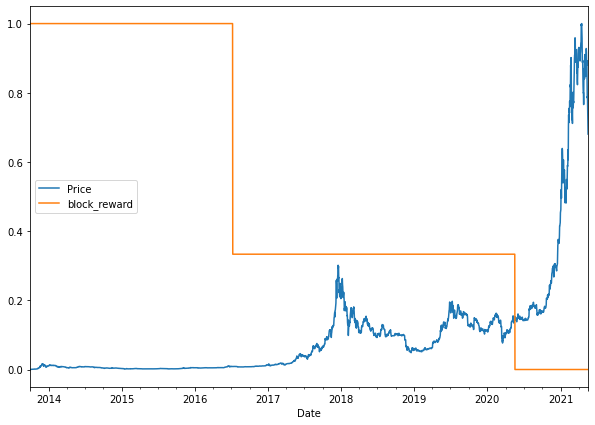

In [103]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_prices_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns= bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)
scaled_prices_block_df.plot(figsize=(10,7));

## Making a windows data with pandas

Previously, we have turned our univarirate time series into windowed dataset using the helper funtions

Now for multivariate, we'll be using `pandas.DataFrame.shift` method

In [104]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [105]:
# Make a copy of Bitcoin Historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [106]:
bitcoin_prices_windowed.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [107]:
# Add a windowed column
for i in range(WINDOW_SIZE): # shift values for each step in  WINDOW_size
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


What we have done is to window our dataset directly from a pandas dataframe

```
[0,1,2,3,4,5,6, block_reward] -> [7]
[1,2,3,4,5,6,7 block_reward] -> [8]
[2,3,4,5,6,7,8 block_reward] -> [9]
```

In [108]:
# Create  X (windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)


In [109]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [110]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [111]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Multivariate(window=7,horizon=1) Dense

In [112]:
# set random seed
tf.random.set_seed(42)

# Create model for multivariate
model_6= tf.keras.Sequential([
    layers.Dense(128, activation= "relu"),
    layers.Dense(HORIZON)                 
], name="model_6_multivariate_dense")

# Compile 
model_6.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam())

# Fit 
model_6.fit(X_train,
            y_train,
            batch_size=128,
            epochs=100,
            verbose=1,
            validation_data=(X_test,y_test),
            callbacks = [create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 4s - loss: 2853.4023INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 30ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.7052INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1732INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 271.0341INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 145.3367INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 231.5105INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 151.5176INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1689INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 177.8448INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 164.4430 - val_loss: 913.5148
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3627INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 158.6892 - val_loss: 874.2507
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0429INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 39ms/step - loss: 152.0732 - val_loss: 861.0418
Epoch 13/100
18/18 [==============================] - 0s 4ms/step - loss: 151.1057 - val_loss: 886.1207
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 152.2400INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 147.5482 - val_loss: 837.8616
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 146.6370INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 142.3497 - val_loss: 794.4788
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 125.8471INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 137.5206 - val_loss: 778.4052
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1490INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 135.8190 - val_loss: 772.4532
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 145.6097INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 134.8562 - val_loss: 747.4802
Epoch 19/100
18/18 [==============================] - 0s 4ms/step - loss: 130.3347 - val_loss: 761.0554
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 145.2515INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 128.6775 - val_loss: 701.8977
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 158.9073INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 129.5576 - val_loss: 691.0128
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 176.6308INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 125.8060 - val_loss: 684.4119
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 125.5263 - val_loss: 692.1298
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1221INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 122.4765 - val_loss: 674.2216
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 133.5674INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 121.1171 - val_loss: 669.6441
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 127.2623 - val_loss: 690.0403
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3230INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 124.6204 - val_loss: 643.9724
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 118.2544 - val_loss: 656.2767
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8149INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 119.6374 - val_loss: 633.4547
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 130.2605INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 119.5001 - val_loss: 625.3953
Epoch 31/100
18/18 [==============================] - 0s 4ms/step - loss: 114.5633 - val_loss: 668.5064
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 121.3793INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 116.9750 - val_loss: 617.1061
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2438 - val_loss: 649.0989
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5187 - val_loss: 632.1375
Epoch 35/100
 1/18 [>.............................] - ETA: 0s - loss: 112.6759INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 113.6357 - val_loss: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 115.2605 - val_loss: 626.4319
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7286INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 113.7020 - val_loss: 606.2318
Epoch 38/100
 1/18 [>.............................] - ETA: 0s - loss: 107.1735INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 111.4061 - val_loss: 603.2919
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4214INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
 1/18 [>.............................] - ETA: 0s - loss: 100.2578INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 1s 40ms/step - loss: 110.5418 - val_loss: 593.2170
Epoch 41/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8671 - val_loss: 609.1062
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7249 - val_loss: 607.4877
Epoch 43/100
18/18 [==============================] - 0s 3ms/step - loss: 111.3313 - val_loss: 606.2029
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 65.3244INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 109.7027 - val_loss: 586.1215
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8748 - val_loss: 593.8445
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 109.8641 - val_loss: 586.4581
Epoch 47/100
18/18 [==============================] - 0s 4ms/step - loss: 112.3587 - val_loss: 655.4489
Epoch 48/100
18/18 [==============================] - 0s 4ms/step - loss: 109.1614 - val_loss: 598.7234
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 109.3029 - val_loss: 589.2489
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 111.1971 - val_loss: 649.3788
Epoch 51/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8514 - val_loss: 602.7667
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 111.8331 - val_loss: 599.2957
Epoch 53/100
18/18 [==============================] - 0s 3ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 110.4068 - val_loss: 575.7752
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - val_loss: 785.9749
Epoch 57/100
18/18 [==============================] - 0s 4ms/step - loss: 124.9823 - val_loss: 670.3782
Epoch 58/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8591 - val_loss: 580.2877
Epoch 59/100
18/18 [==============================] - 0s 13ms/step - loss: 107.2513 - val_loss: 597.5082
Epoch 60/100
18/18 [==============================] - 0s 11ms/step - loss: 109.2322 - val_loss: 632.2958
Epoch 61/100
18/18 [==============================] - 0s 13ms/step - loss: 109.3519 - val_loss: 591.5412
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 108.4084 - val_loss: 617.5801
Epoch 63/100
18/18 [==============================] - 0s 8ms/step - loss: 113.5326 - val_loss: 613.1476
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss:

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 112.0475 - val_loss: 575.5540
Epoch 66/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2830 - val_loss: 590.7802
Epoch 67/100
18/18 [==============================] - 0s 4ms/step - loss: 106.7918 - val_loss: 586.8840
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 112.2987 - val_loss: 696.5287
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7808 - val_loss: 698.5261
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3443 - val_loss: 581.2100
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9960 - val_loss: 607.6742
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7779INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 106.7711 - val_loss: 573.6142
Epoch 73/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2485 - val_loss: 618.8947
Epoch 74/100
18/18 [==============================] - 0s 3ms/step - loss: 105.5330 - val_loss: 574.9452
Epoch 75/100
18/18 [==============================] - 0s 3ms/step - loss: 107.3177 - val_loss: 606.1979
Epoch 76/100
18/18 [==============================] - 0s 3ms/step - loss: 107.8084 - val_loss: 582.2403
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.6437INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 24ms/step - loss: 107.2528 - val_loss: 571.8563
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 106.2309 - val_loss: 572.2830
Epoch 79/100
18/18 [==============================] - 0s 4ms/step - loss: 105.8568 - val_loss: 596.5461
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.8418 - val_loss: 577.2400
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 26ms/step - loss: 105.1101 - val_loss: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1867 - val_loss: 592.5609
Epoch 83/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9631 - val_loss: 651.6213
Epoch 84/100
18/18 [==============================] - 0s 3ms/step - loss: 109.6690 - val_loss: 568.9340
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 105.8219 - val_loss: 571.5334
Epoch 86/100
18/18 [==============================] - 0s 4ms/step - loss: 104.8628 - val_loss: 579.3859
Epoch 87/100
18/18 [==============================] - 0s 4ms/step - loss: 104.7148 - val_loss: 582.9178
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 106.8899 - val_loss: 569.0820
Epoch 89/100
18/18 [==============================] - 0s 4ms/step - loss: 105.4376 - val_loss: 569.3439
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_multivariate_dense/assets


18/18 [==============================] - 0s 25ms/step - loss: 107.7017 - val_loss: 567.8899
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 107.9951 - val_loss: 626.7441


In [113]:
# evaluate best performing model_6
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate_dense")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [114]:
# Make predictions
model_6_preds = make_preds(model_6, X_test)
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [115]:
# Calculate results
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.8899,
 'mape': 2.5460758,
 'mase': 0.99762523,
 'mse': 1164816.4,
 'rmse': 1079.2666}

## N-BEATS Algorithms

Because the N-BEATS block layer doesnt exist in TensorFlow, we have to create it.

To create custom layer and models in tensorflow we can use subclassing.

In [116]:
# Create NBEAT block custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")
  
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:,-self.horizon]
    return backcast, forecast

In [117]:
# set up dummy NBeatsBlock layer to represent inputs and outputs
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                      theta_size = WINDOW_SIZE + HORIZON, # backcast + forecast
                                      horizon = HORIZON,
                                      n_neurons = 128,
                                      n_layers = 4)

In [118]:
# Pass dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [119]:
# Pass the dummy inputs to dummy_nbeats_block_layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the neurons)
print(f"Backcast:{tf.squeeze(backcast.numpy())}")
print(f"Forecast:{tf.squeeze(forecast.numpy())}")

Backcast:[ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast:1.0071648359298706


## Preparing data for the N-BEATS algorithm with `tf.data`

To make our input dat as fast as possible we will be adhering to the performant data pipeline steps with `tf.data`

In [120]:
HORIZON = 1
WINDOW_SIZE = 7

In [121]:
# Create N-BEATS data inputs (N-BEATS works with univariate time series)
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [122]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head(8)

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499


In [123]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

In [124]:
# Split it in train and test
split_size =int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [125]:
# Make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset =test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for N-BEATS algorithm

In [126]:
# Values of N_BEATS Paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

## Getting ready for residual connections

Before we can craft our N-BEAT model, we need two layers for the residual connections (substract and add)

In [124]:
# Make tensor
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [126]:
# Subtract 
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensor:{tensor_1.numpy()}&{tensor_2.numpy()}")
print(f"Subtracted:{subtracted.numpy()}")
print(f"Added:{added.numpy()}")

Input tensor:[10 11 12 13 14 15 16 17 18 19]&[0 1 2 3 4 5 6 7 8 9]
Subtracted:[10 10 10 10 10 10 10 10 10 10]
Added:[10 12 14 16 18 20 22 24 26 28]


### Building, compiling and fitting N-BEATS model
1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block used for the network, the rest will be created as part of stacks)
2. Create an input layer fot the N-BEATS stack (we'll be using the `Keras Functional API`)
3. Make the intial backcast and forecast for the model with the layers ceated in 1
4. Use for loop to create stacks of block layers.
5. Use the NBeatsBlock class within the for loop in (4) to create blocks which return backcasts and block-level forecasts 
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and the outputs together using `tf.keras.Model()`
8. Compile the model with MAE loss (the paper uses multiple losses but we'll use `MAE `to keep it inline with our other models) and `Adam` optimizer with default settings as per section 5.2 of N-BEATS paper.
9. Fit the N-BEATS model for `5000 epochs` and since it's fitting for so many epochs, we'll use a couple of callbacks:
 * `Early Stopping:` because the model will be training for so long, we should stop it early it it stops improving!!!
 * `Reduce LR on Plateau:` if a model stops improving, try loweing the learning rate to reduce the amount it updates its weights each time  (as in take smaller steps towards best performance)


In [127]:
%%time

tf.random.set_seed(42)

# 1. Setup an instance of NBeatsBlock 
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size= THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InititalBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE),name="stack_input")

#3. Create inital backcast and forecast input (backwards predictions + horizon predictions)
residuals, forecast = nbeats_block_layer(stack_input)
#Add in subtraction residual link
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals)  # Pass in the residuals
  
  #6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

#7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLRonPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 713: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 813: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 28s, sys: 4.77 s, total: 2min 33s
Wall time: 2min 56s


In [131]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 63ms/step - loss: 575.3867


575.3866577148438

In [132]:
# Make predictions with N-BEATS Model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8842.111, 8777.395, 9027.169, 8760.2  , 8749.426, 8748.887,
       8652.287, 8498.097, 8475.569, 8509.318], dtype=float32)>

In [133]:
# Evaluate N-BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 575.38666,
 'mape': 2.5860977,
 'mase': 1.010795,
 'mse': 1172371.6,
 'rmse': 1082.7611}

even with all of those special layers and hand-crafted network, it looks like the N-BEATS model doesn't perform as well as model_1 or the original naive forecast.

This goes to show the power of smaller networks as well as the fact not all larger models are better suited for a certain type of data.

## Plotting the N-Beats architecture we'have created

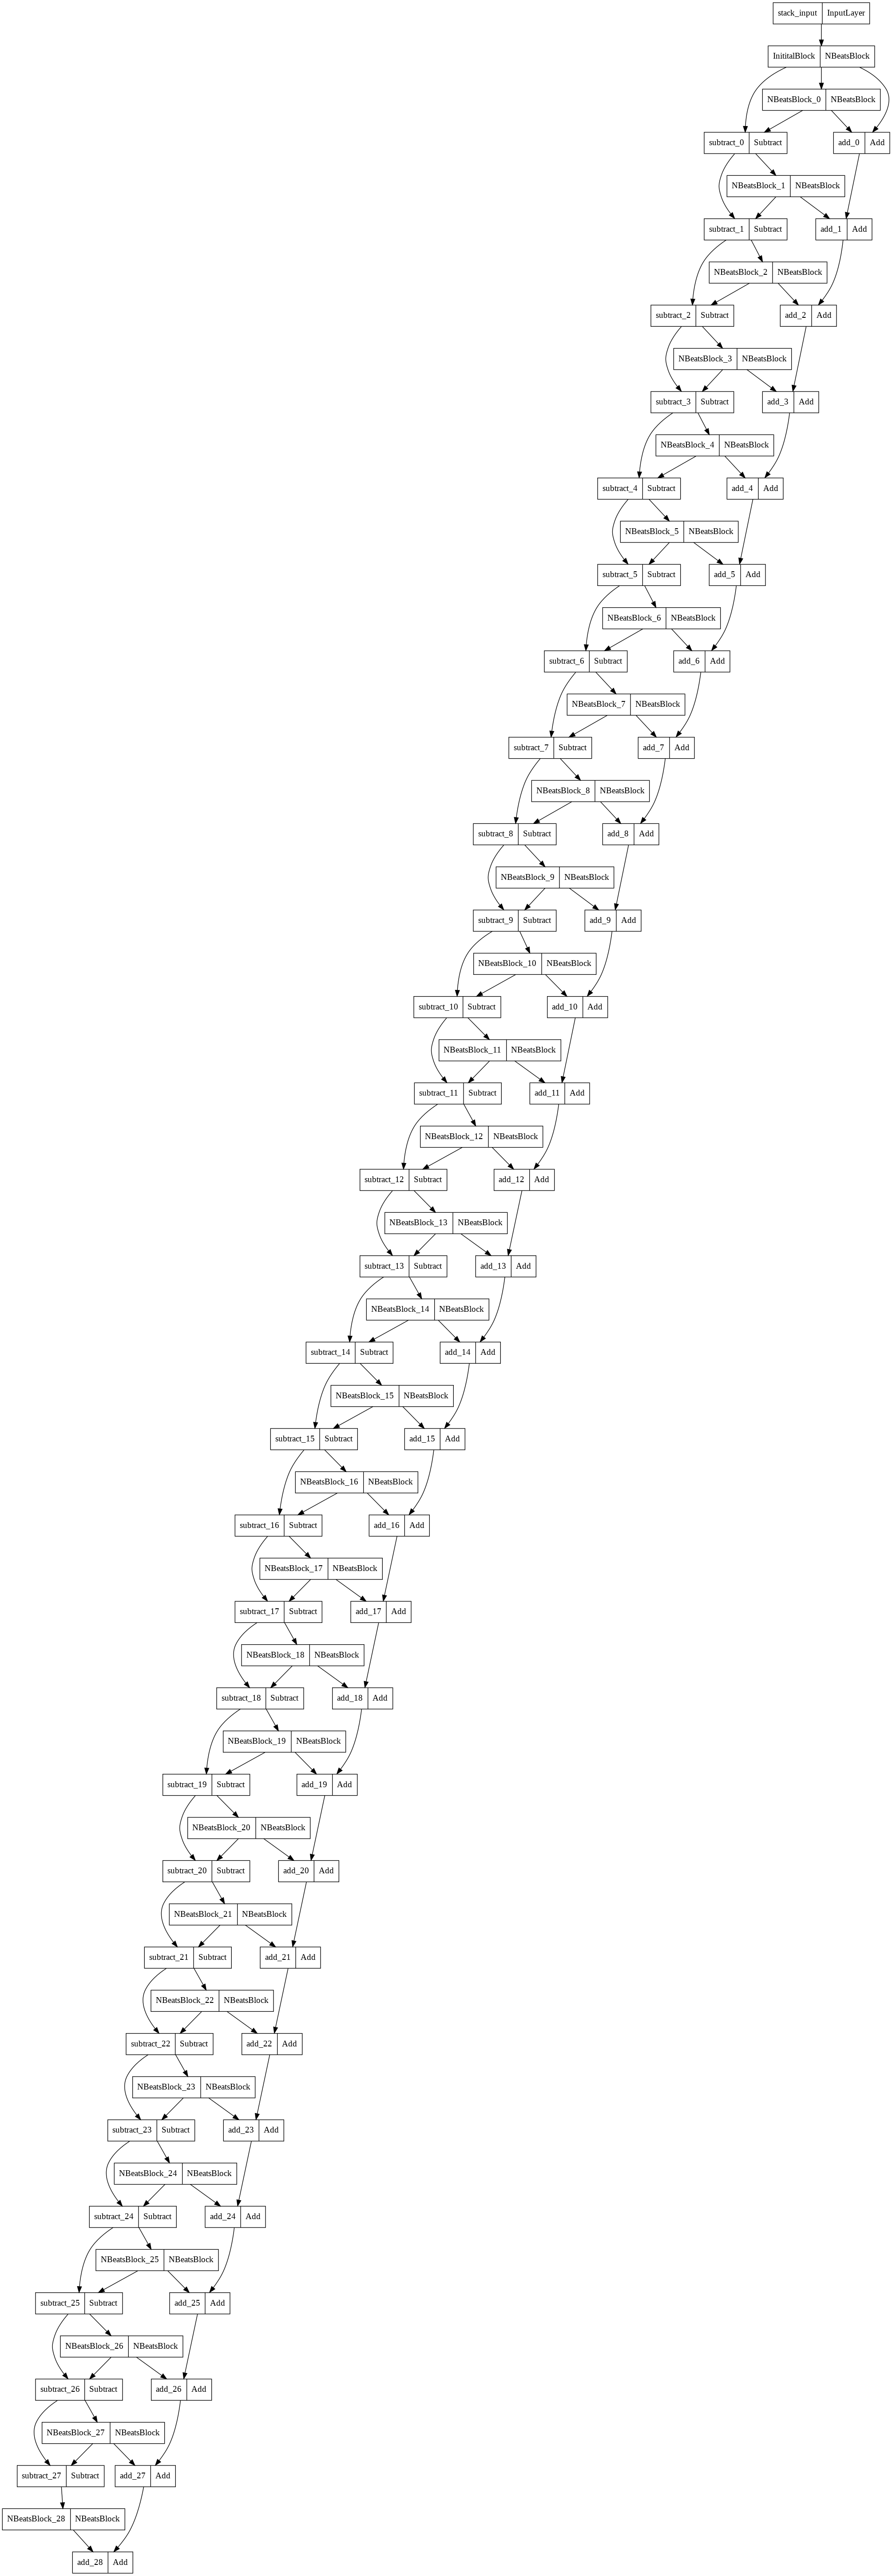

In [136]:
# Plot the N-Beats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble (stacking multiple models together)

An ensemble leverages the wisdom of the crowd effect

It combines many _different_ models to predict a common model.

In [125]:
HORIZON, WINDOW_SIZE

(1, 7)

### Constructing and fitting an ensemble of models (using different loss functions)

In [127]:
def get_ensemble_model(horizon=HORIZON,
                       train_data=train_dataset,
                       test_data=test_dataset,
                       num_iter=10,
                       num_epochs=1000,
                       loss_fns=["mae","mse","mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE, and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10* len(["mae","mse","mape"]).
  """
  # Make empty list for traind ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss functions
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs and model number:{i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Inititalize dense layers with normal distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          layers.Dense(HORIZON)                        
      ])

      # Compile simple model with current loss functions
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)
  
  return ensemble_models


In [128]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_model(num_iter=5,
                                      num_epochs=100)

Optimizing model by reducing: mae for 100 epochs and model number:0
Optimizing model by reducing: mse for 100 epochs and model number:0
Optimizing model by reducing: mape for 100 epochs and model number:0
Optimizing model by reducing: mae for 100 epochs and model number:1
Optimizing model by reducing: mse for 100 epochs and model number:1
Optimizing model by reducing: mape for 100 epochs and model number:1
Optimizing model by reducing: mae for 100 epochs and model number:2
Optimizing model by reducing: mse for 100 epochs and model number:2
Optimizing model by reducing: mape for 100 epochs and model number:2
Optimizing model by reducing: mae for 100 epochs and model number:3
Optimizing model by reducing: mse for 100 epochs and model number:3
Optimizing model by reducing: mape for 100 epochs and model number:3
Optimizing model by reducing: mae for 100 epochs and model number:4
Optimizing model by reducing: mse for 100 epochs and model number:4
Optimizing model by reducing: mape for 100 e

In [129]:
len(ensemble_models)

15

In [130]:
ensemble_models

## Make predictions with our enseble model

In [139]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [140]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

CPU times: user 153 ms, sys: 11.2 ms, total: 164 ms
Wall time: 148 ms


In [141]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8922.51 ,  8519.315,  8588.979, ..., 48623.22 , 47835.914,
        45360.78 ],
       [ 8710.554,  8751.568,  9092.771, ..., 49979.73 , 48572.906,
        46652.96 ],
       [ 8341.191,  8212.764,  8579.021, ..., 46604.785, 47433.03 ,
        45770.508],
       ...,
       [ 9121.447,  8825.23 ,  8829.257, ..., 49021.895, 49666.426,
        46926.21 ],
       [ 8802.272,  8836.9  ,  9028.346, ..., 50830.35 , 47096.83 ,
        44964.918],
       [ 8563.584,  8520.701,  8791.288, ..., 48785.08 , 46876.9  ,
        44772.285]], dtype=float32)>

In [142]:
model_1_results

{'mae': 568.95105,
 'mape': 568.95105,
 'mase': 0.9994894,
 'mse': 1171743.8,
 'rmse': 1082.4711}

Our ensemble preds come out in multiple dimensions but to combine into point predictions we can leverage the mean of all of the predictions or the median - https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/



In [146]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8640.235, 8553.34 , 8734.548, 8495.216, 8471.92 , 8493.432,
       8425.377, 8256.832, 8217.548, 8258.426], dtype=float32)>

In [148]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median[:10]

array([8802.272, 8699.764, 8941.873, 8611.143, 8678.362, 8688.877,
       8561.692, 8427.692, 8401.253, 8448.25 ], dtype=float32)

In [150]:
# Evaluate ensemble model_predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_preds)
ensemble_results

{'mae': 1059.4773,
 'mape': 5.091796,
 'mase': 1.8612082,
 'mse': 4354192.5,
 'rmse': 1692.6437}

In [152]:
# 
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 598.8918,
 'mape': 2.7556367,
 'mase': 1.052087,
 'mse': 1237343.8,
 'rmse': 1112.3595}

In [153]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_mean)
ensemble_results

{'mae': 783.0093,
 'mape': 3.7800245,
 'mase': 1.3755305,
 'mse': 1697556.2,
 'rmse': 1302.903}